In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values     #Training and testing set

In [5]:
#Feature Scaling (always use on Deep Learning Problems)

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range =(0,1))

In [6]:
X_scaled =sc.fit_transform(X)

In [7]:
X_scaled

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [8]:
#Training the SOM

from minisom import MiniSom 

In [9]:
som = MiniSom(x=10,y=10,input_len = 15,sigma =1.0,learning_rate = 0.5)

In [10]:
som.random_weights_init(X)  #Initialise wieghts
som.train_random(data =X,num_iteration = 100)

In [11]:
#Plot the map

from pylab import bone,pcolor,colorbar,plot,show

In [12]:
bone()


<Figure size 432x288 with 0 Axes>

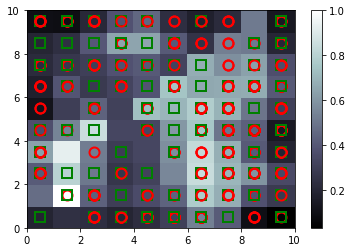

In [13]:
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors =['r','g']

for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],markeredgecolor =colors[y[i]],markerfacecolor ='None',markersize =10,markeredgewidth =2)
show()    

In [14]:
#Finding the frauds

mappings = som.win_map(X)
mappings

defaultdict(list,
            {(5,
              1): [array([1.5776156e+07, 1.0000000e+00, 2.2080000e+01, 1.1460000e+01,
                     2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.5850000e+00,
                     0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
                     2.0000000e+00, 1.0000000e+02, 1.2130000e+03]), array([1.577575e+07, 1.000000e+00, 2.825000e+01, 5.040000e+00,
                     1.000000e+00, 8.000000e+00, 5.000000e+00, 1.500000e+00,
                     1.000000e+00, 1.000000e+00, 8.000000e+00, 1.000000e+00,
                     2.000000e+00, 1.440000e+02, 8.000000e+00]), array([1.5773421e+07, 0.0000000e+00, 2.0750000e+01, 1.0335000e+01,
                     2.0000000e+00, 1.3000000e+01, 8.0000000e+00, 3.3500000e-01,
                     1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
                     2.0000000e+00, 8.0000000e+01, 5.1000000e+01]), array([1.5775235e+07, 1.0000000e+00, 4.3080000e+01, 3.7500000e-01,
   

In [15]:
frauds = mappings[(1,6)]

In [22]:
frauds = sc.inverse_transform(frauds)

In [23]:
frauds

array([[3.91845637e+12, 1.00000000e+00, 1.85912500e+03, 3.61200000e+01,
        5.00000000e+00, 5.30000000e+01, 6.50000000e+01, 7.12500000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        3.00000000e+00, 2.80000000e+05, 1.00001000e+05],
       [3.91835647e+12, 1.00000000e+00, 1.41025000e+03, 8.40000000e+01,
        3.00000000e+00, 2.70000000e+01, 3.30000000e+01, 3.09225000e+01,
        1.00000000e+00, 1.00000000e+00, 5.36000000e+02, 1.00000000e+00,
        5.00000000e+00, 3.20000000e+05, 2.00001000e+05],
       [3.91855076e+12, 1.00000000e+00, 3.01755500e+03, 4.20000000e+01,
        5.00000000e+00, 1.05000000e+02, 3.30000000e+01, 7.12500000e+01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e+00, 2.80000000e+05, 1.00001000e+05],
       [3.91830178e+12, 1.00000000e+00, 2.27475000e+03, 1.54000000e+02,
        3.00000000e+00, 1.05000000e+02, 3.30000000e+01, 4.27500000e+01,
        0.00000000e+00, 0.00000000e+0

In [28]:
#Creating the matrix of features

customers = df.iloc[:,1:].values

In [29]:
customers

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

In [30]:
#Creating the dependant variables

is_fraud= np.zeros(len(df))

In [31]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
for i in range(len(df)):
    if df.iloc[i,0] in frauds:
        if_fraud[i] =1
        

In [33]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
if is_fraud == True:
    print(is_fraud)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()